installing the libraries

In [12]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing the libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Importing the dataset

In [71]:
df = pd.read_csv('hotels_train.csv')

In [72]:
df.head()

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
0,INN09588,1,5,Room_Type 1,half board,2,0,0,0,2,34.0,Online,0,0,0,108.4,11/28/2018,0
1,INN07691,0,3,Room_Type 1,NaN,2,0,0,0,0,365.0,NaN,0,0,0,NaN,11/03/2018,1
2,INN32192,0,2,Room_Type 4,half board,1,0,0,0,1,148.0,Online,0,0,0,137.3,05/06/2018,0
3,INN32218,1,2,Room_Type 1,NaN,2,0,0,0,0,502.0,Offline,0,0,0,127.0,9/26/2018,1
4,INN02994,1,3,Room_Type 4,half board,2,0,1,0,2,32.0,Offline,0,0,0,110.0,10/19/2017,0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   27213 non-null  object        
 1   weekend_nights       27213 non-null  int64         
 2   week_nights          27213 non-null  int64         
 3   room_type            27213 non-null  int32         
 4   board_type           19045 non-null  object        
 5   n_adults             27213 non-null  int64         
 6   n_less_12            27213 non-null  int64         
 7   n_more_12            27213 non-null  int64         
 8   booked_tour          27213 non-null  int64         
 9   n_requests           27213 non-null  int64         
 10  lead_time            26794 non-null  float64       
 11  purchase_type        22366 non-null  object        
 12  n_p_cacellation      27213 non-null  int64         
 13  n_p_not_cacellation  27213 non-

In [74]:
print("number of rows in the dataset: ", df.shape[0])
print("number of columns in the dataset: ", df.shape[1])

number of rows in the dataset:  27213
number of columns in the dataset:  18


convert columns with object type to int type

In [75]:
df['room_type'] = df['room_type'].str.extract('(\d+\.?\d*)', expand = True).astype(int)

In [76]:
df['purchase_type'].value_counts()

purchase_type
Online           14306
Offline           6501
Corporate         1238
Complementary      244
Aviation            77
Name: count, dtype: int64

In [33]:
df['room_type'].value_counts()

room_type
1.0    21084
4.0     4571
6.0      741
2.0      511
5.0      180
7.0      123
3.0        3
Name: count, dtype: int64

In [34]:
df['board_type'].value_counts()

board_type
half board      14591
full board       2697
breakfast        1753
not selected        4
Name: count, dtype: int64

In [81]:
df['date'] = pd.to_datetime(df['date'], format = 'mixed')

DateParseError: day is out of range for month: 2018-2-29, at position 206

In [96]:
np.where(df['date'] =='2018-2-29')

(array([  389,  1048,  2872,  3398,  4753,  6521,  7110,  8039,  9087,
         9165,  9852, 11893, 13943, 14421, 14886, 16091, 18667, 19680,
        20142, 21605, 21898, 22095, 22115, 22153, 22940, 24593],
       dtype=int64),)

In [97]:
df['date'] = df['date'].replace('2018-2-29', '2018-3-1')

In [98]:
df['date'] = pd.to_datetime(df['date'], format = 'mixed')

In [103]:
df['month'] = df['date'].dt.month.astype(int)

In [109]:
df['n_guests'] = df['n_adults'] + df['n_less_12'] + df['n_more_12']

In [ ]:
df['purchase_type'] = df['purchase_type'].astype('category')
df['is_canceled'] = df['is_canceled'].astype('category')

In [110]:
df.describe()

,weekend_nights,week_nights,room_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled,month,n_guests
count,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,26794.000000,27213.000000,27213.000000,27213.000000,23808.000000,27213,27213.000000,27213.000000,27213.000000
mean,0.812810,2.197332,1.712637,1.845221,0.052989,0.053357,0.031750,0.621100,102.952377,0.021975,0.155404,0.026421,123.455494,2018-05-25 06:06:04.325873664,0.327674,7.430456,1.951567
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2015-10-02 00:00:00,0.000000,1.000000,1.000000
25%,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,100.300000,2018-02-28 00:00:00,0.000000,5.000000,2.000000
50%,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,119.450000,2018-06-13 00:00:00,0.000000,8.000000,2.000000
75%,2.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,153.000000,0.000000,0.000000,0.000000,140.000000,2018-09-19 00:00:00,1.000000,10.000000,2.000000
max,7.000000,17.000000,7.000000,4.000000,6.000000,4.000000,1.000000,5.000000,532.000000,13.000000,57.000000,1.000000,560.000000,2018-12-31 00:00:00,1.000000,12.000000,12.000000
std,0.869317,1.403576,1.404446,0.519715,0.266150,0.268688,0.175336,0.785642,103.498942,0.346697,1.728693,0.160387,35.136566,NaN,0.469374,3.061317,0.650540


In [40]:
df.describe(include = 'object')

,ID,board_type,purchase_type,date
count,27213,19045,22366,27213
unique,27213,4,5,553
top,INN09588,half board,Online,10/13/2018
freq,1,14591,14306,188


In [21]:
df.isnull().sum()

ID                        0
weekend_nights            0
week_nights               0
room_type                 0
board_type             8168
n_adults                  0
n_less_12                 0
n_more_12                 0
booked_tour               0
n_requests                0
lead_time               419
purchase_type          4847
n_p_cacellation           0
n_p_not_cacellation       0
repeated                  0
price                  3405
date                      0
is_canceled               0
dtype: int64

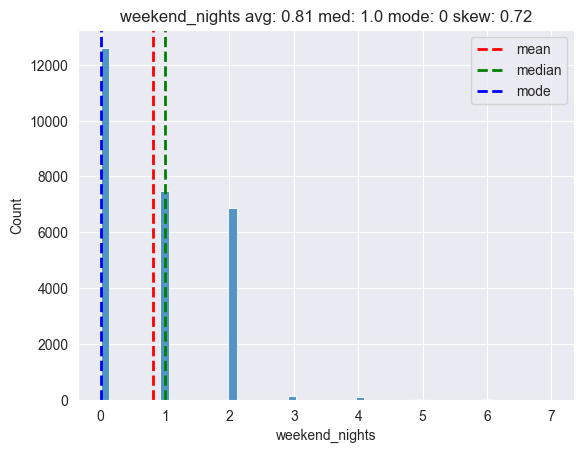

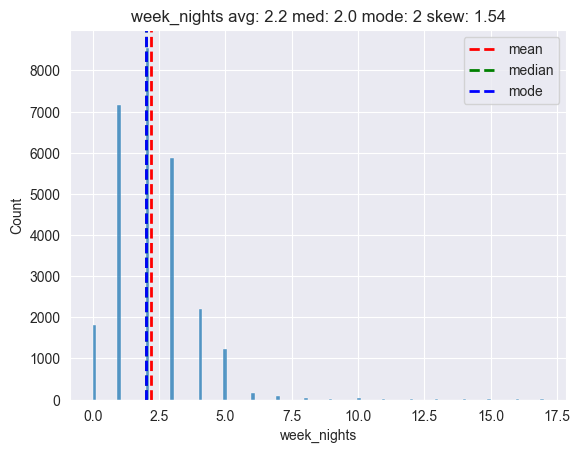

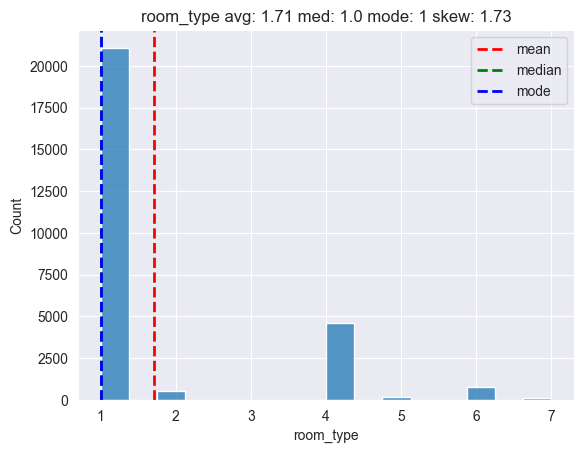

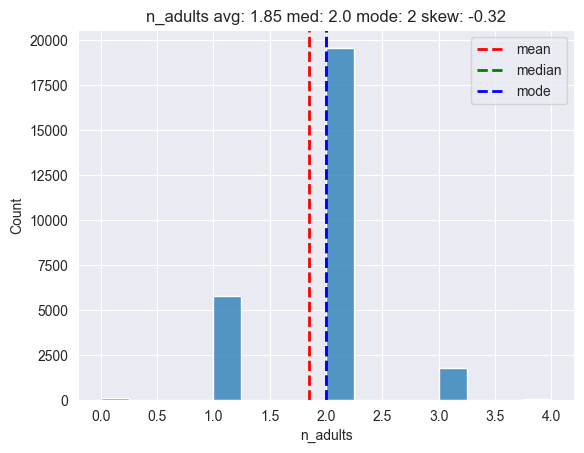

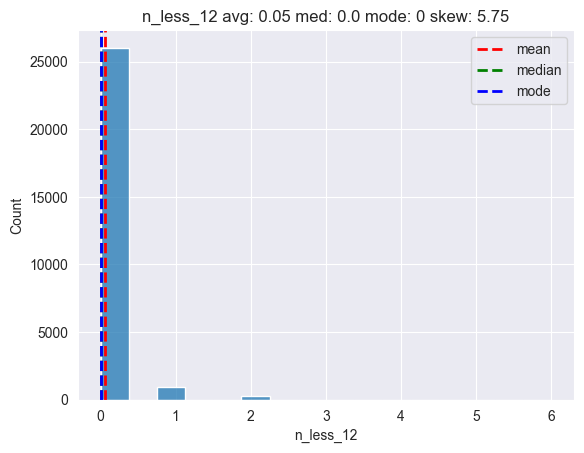

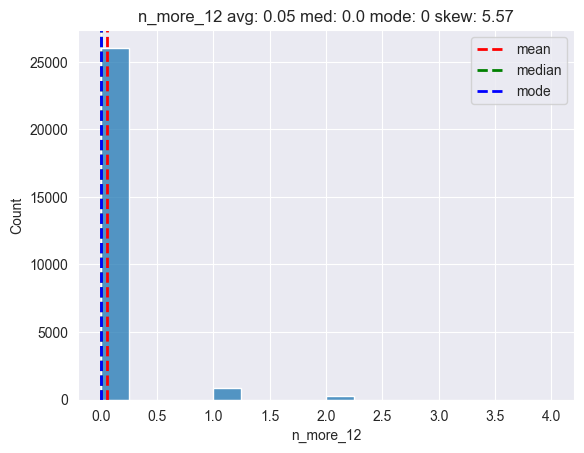

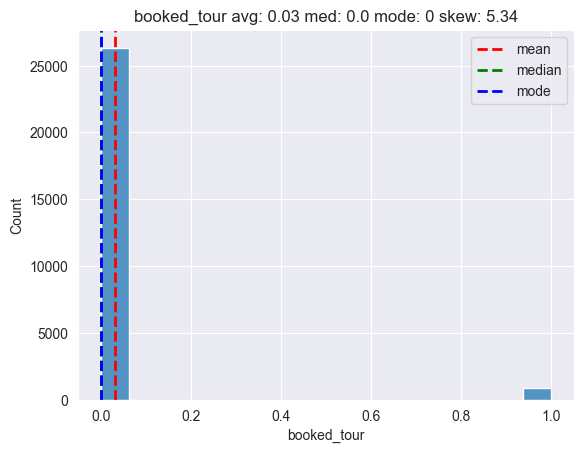

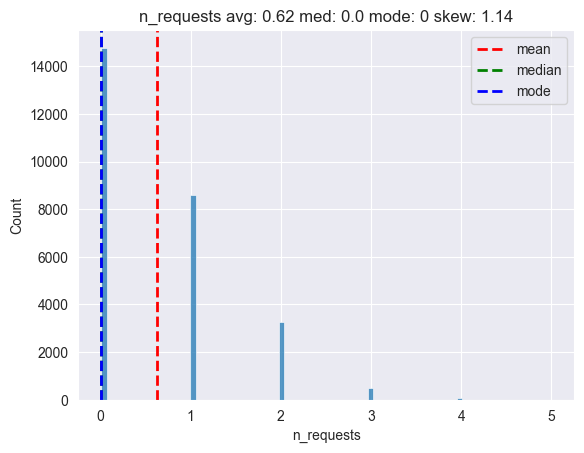

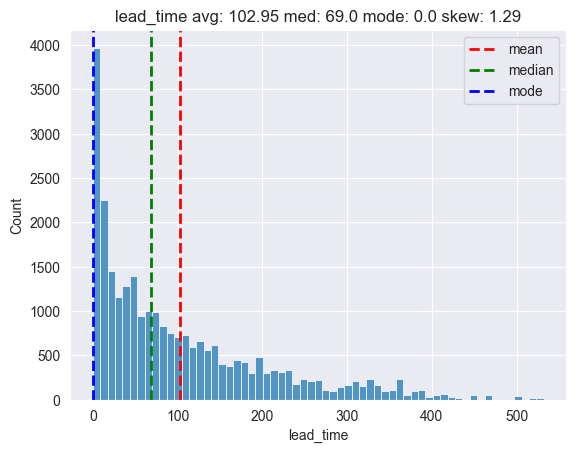

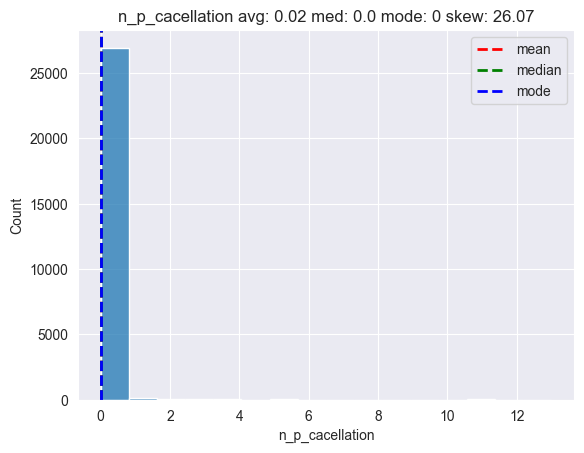

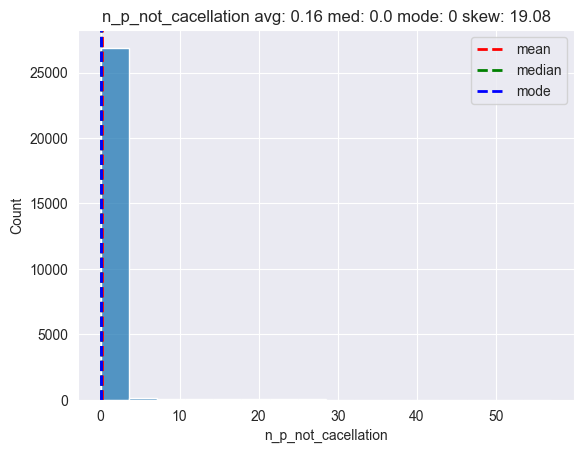

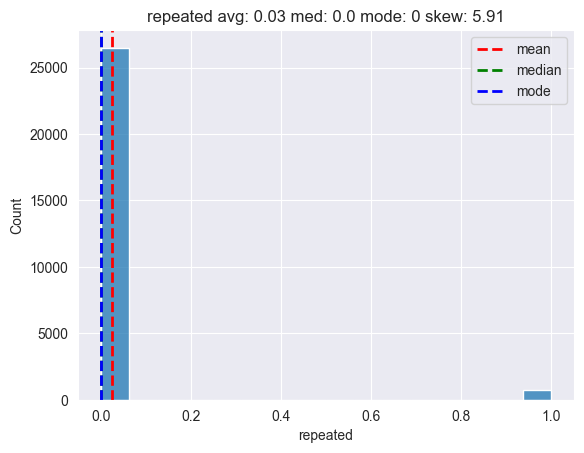

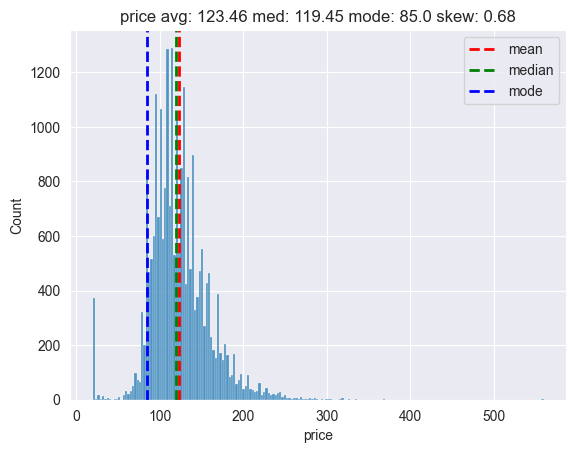

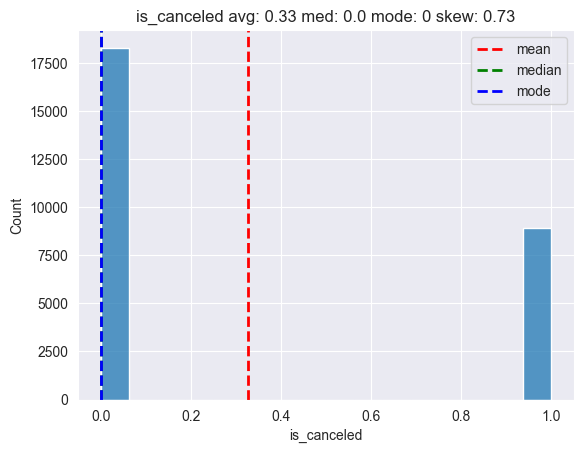

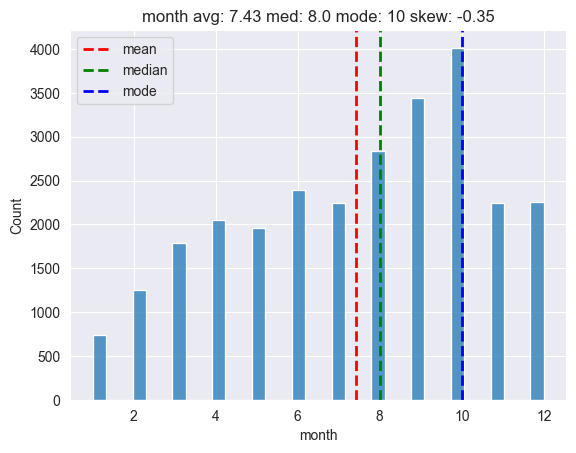

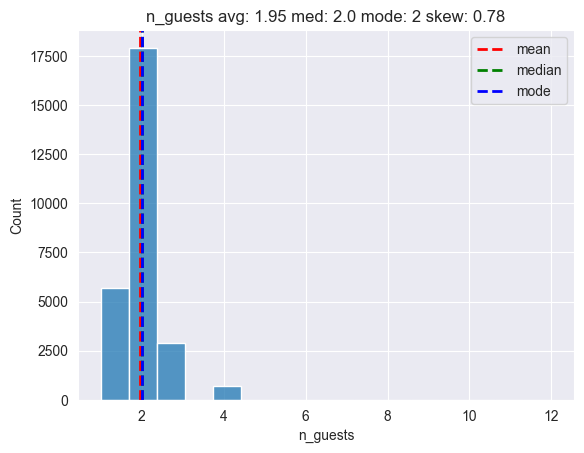

In [111]:
columns = df.columns
columns_to_plot = [col for col in columns if df[col].dtype == 'int64' or df[col].dtype == 'float64' or df[col].dtype == 'int32']
for col in columns_to_plot:
    sns.histplot(df[col])
    avg = df[col].mean()
    med = df[col].median()
    mode = df[col].mode()[0]
    skew = df[col].skew()
    plt.axvline(avg, color = 'r', linestyle = 'dashed', linewidth = 2, label = 'mean')
    plt.axvline(med, color = 'g', linestyle = 'dashed', linewidth = 2, label = 'median')
    plt.axvline(mode, color = 'b', linestyle = 'dashed', linewidth = 2, label = 'mode')
    plt.legend()
    plt.title(col + ' avg: ' + str(round(avg, 2)) + ' med: ' + str(round(med, 2)) + ' mode: ' + str(round(mode, 2)) + ' skew: ' + str(round(skew, 2)))
    plt.show()

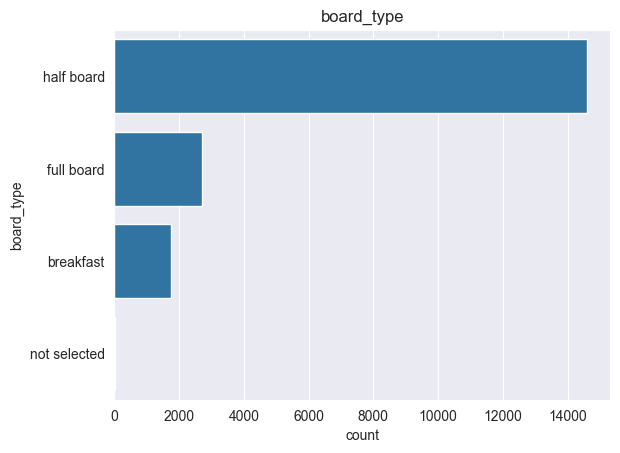

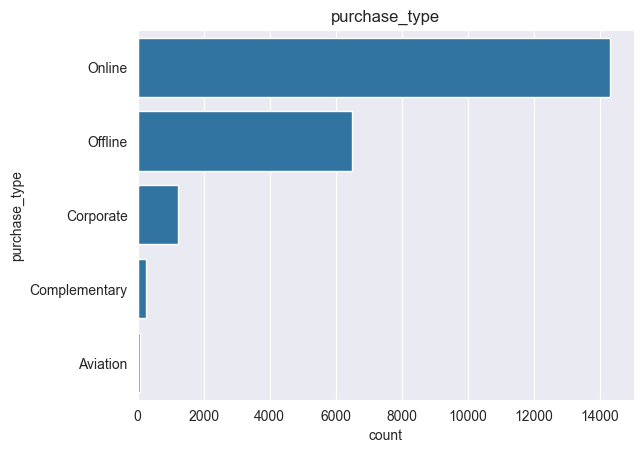

In [44]:
columns_to_plot = [col for col in columns if df[col].dtype == 'object' and col != 'ID' and col != 'date']
for col in columns_to_plot:
    sns.countplot(df[col])
    plt.title(col)
    plt.show()

Attributes correlation

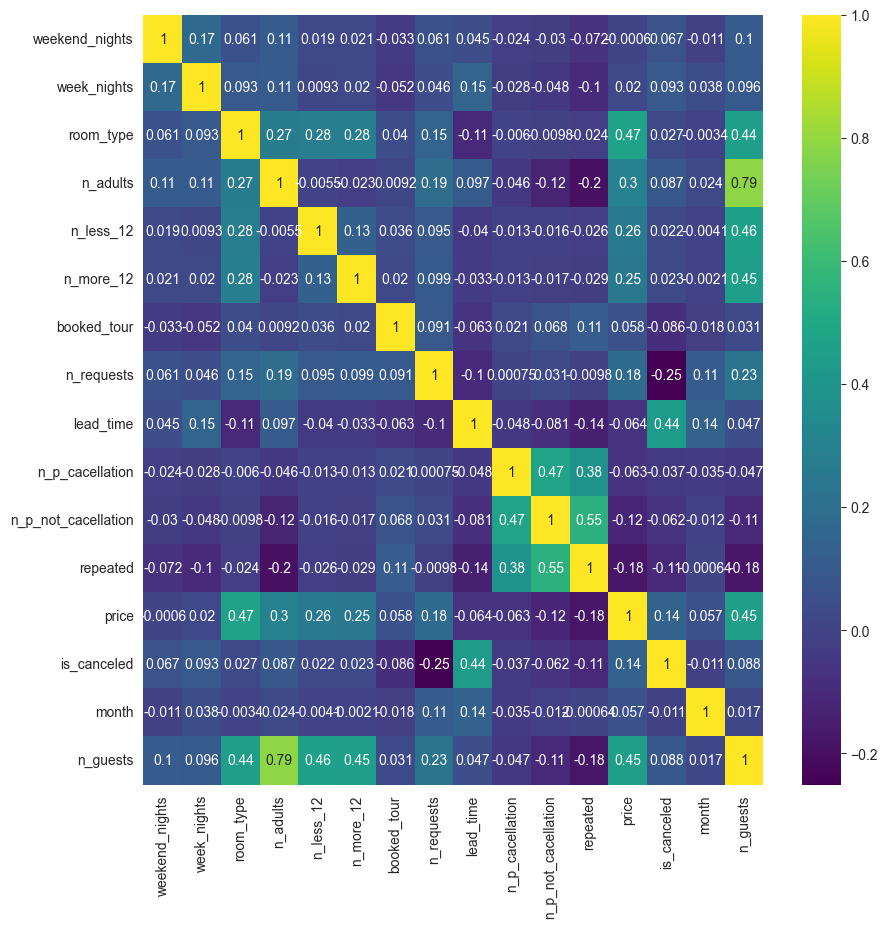

In [112]:
columns_to_corr = [col for col in columns if df[col].dtype == 'int64' or df[col].dtype == 'float64' or df[col].dtype == 'int32']
corr = df[columns_to_corr].corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, cmap = 'viridis')
plt.show()

Main insights:
cancellation:
- positively correlated with the lead time, and its reasonable as the more the lead time the more the chance of cancellation (unexpected events, change of plans, etc)
- negatively correlated with the number of requests, and its reasonable as the more the number of requests, the customer is more dependent on the hotel and less likely to cancel
- negatively correlated with the number of repeated times, and its reasonable as the more the customer repeats the reservation, the more satisfied he is and less likely to cancel
- positively correlated with the price, and its reasonable as the more the price the more the customer will be able to find a better deal and cancel

price:
- positively correlated with the room type, and its reasonable as the room is better the price is higher
- positively correlated with the number of guests, and its reasonable as the more the guests the more the price
- positively correlated with the number of requests, and its reasonable as the more the requests the more the price
- negatively correlated with the number of repeated times, and its reasonable as the more the customer repeats the reservation, he likely to get a discount
room type:
- positively correlated with the number of guests, and its reasonable as the more the guests the bigger the room

Visualizing the data

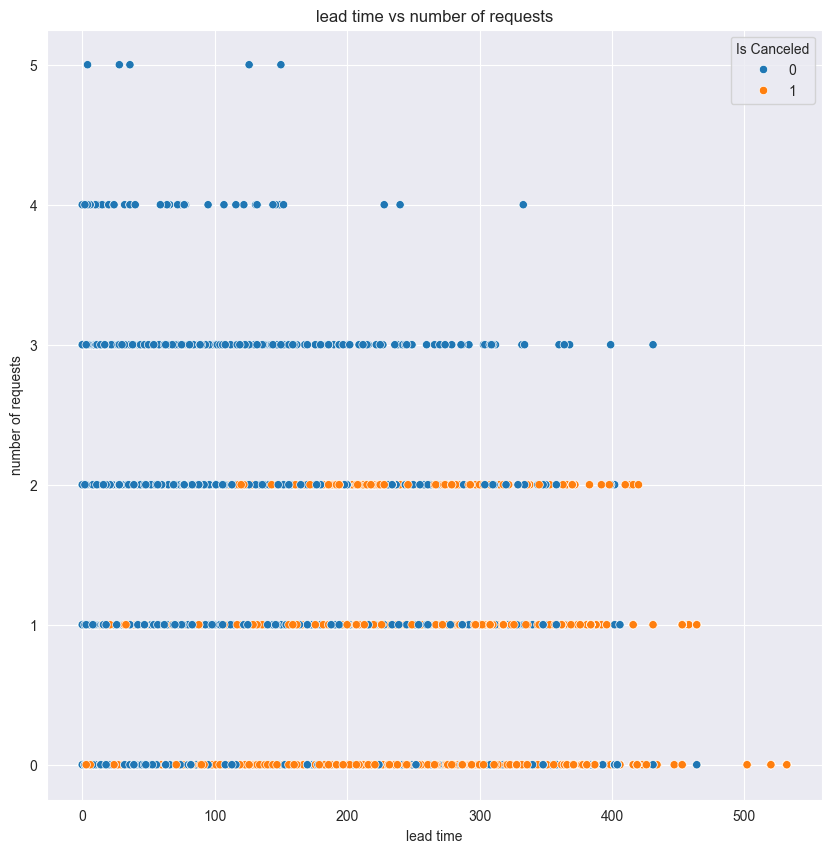

In [127]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x='lead_time', y='n_requests', hue='is_canceled', data=df)
plt.xlabel('lead time')
plt.ylabel('number of requests')
plt.title('lead time vs number of requests')
plt.legend(title='Is Canceled')
plt.show()

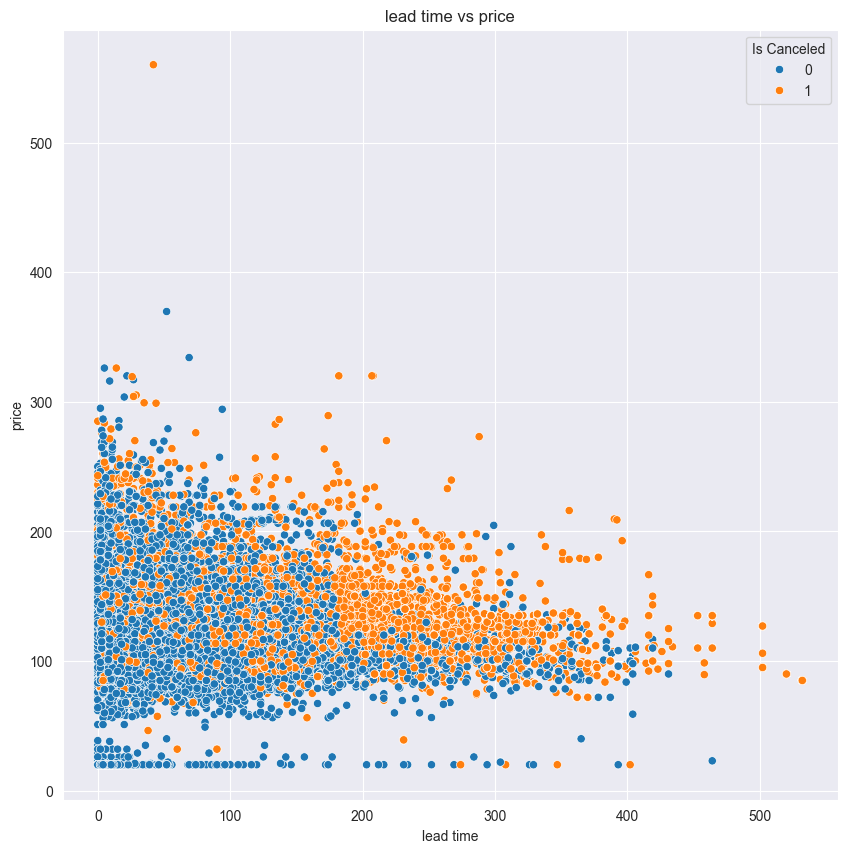

In [126]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x='lead_time', y='price', hue='is_canceled', data=df)
plt.xlabel('lead time')
plt.ylabel('price')
plt.title('lead time vs price')
plt.legend(title='Is Canceled')
plt.show()

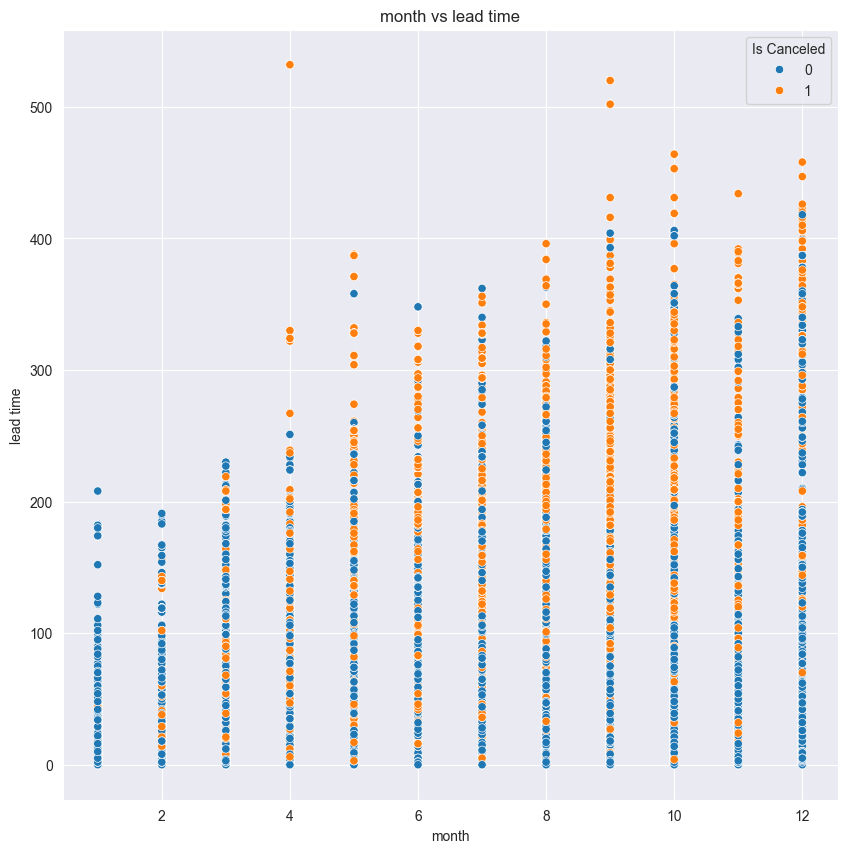

In [124]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x='month', y='lead_time', hue='is_canceled', data=df)
plt.xlabel('month')
plt.ylabel('lead time')
plt.title('month vs lead time')
plt.legend(title='Is Canceled')
plt.show()

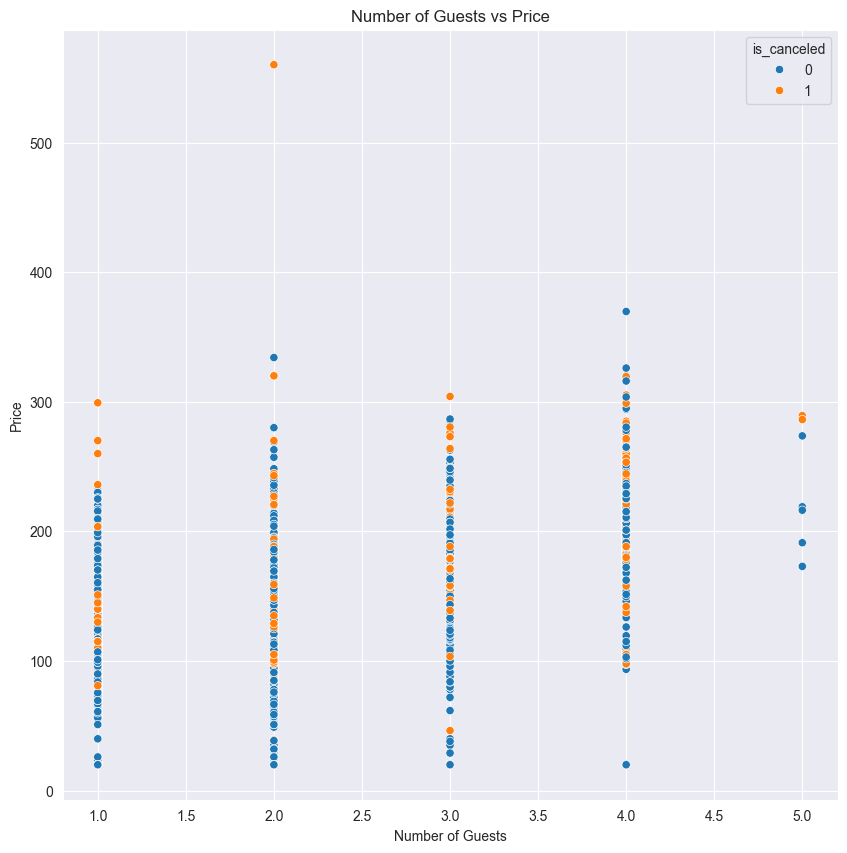

In [122]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x='n_guests', y='price', hue='is_canceled', data=df)
plt.title('Number of Guests vs Price')
plt.xlabel('Number of Guests')
plt.ylabel('Price')
plt.show()

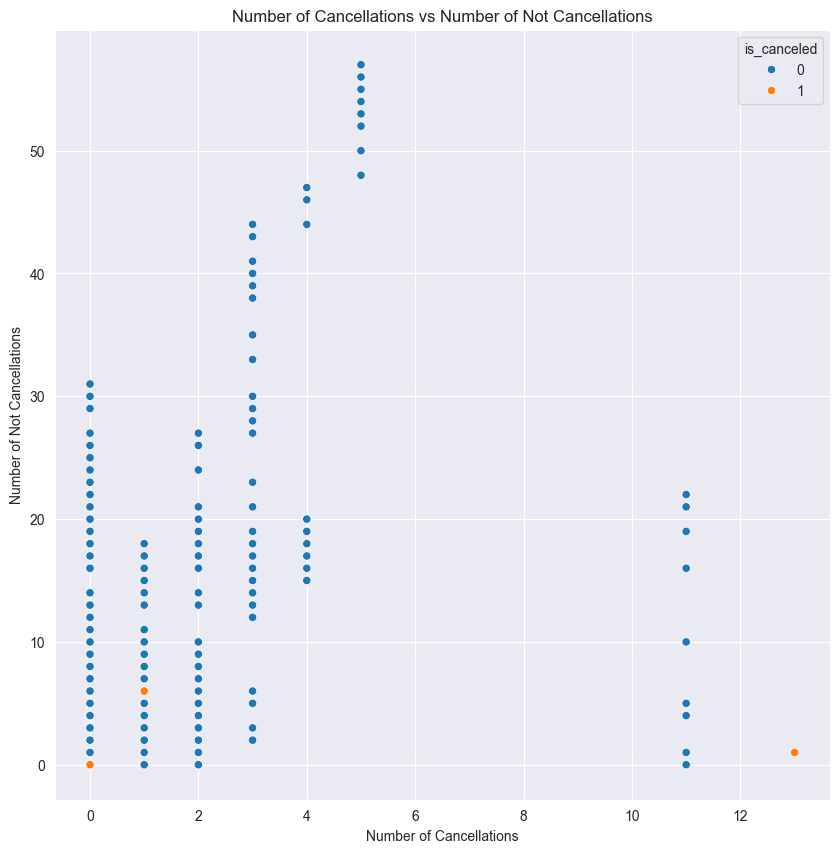

In [132]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x='n_p_cacellation', y='n_p_not_cacellation', hue='is_canceled', data=df)
plt.title('Number of Cancellations vs Number of Not Cancellations')
plt.xlabel('Number of Cancellations')
plt.ylabel('Number of Not Cancellations')
plt.show()

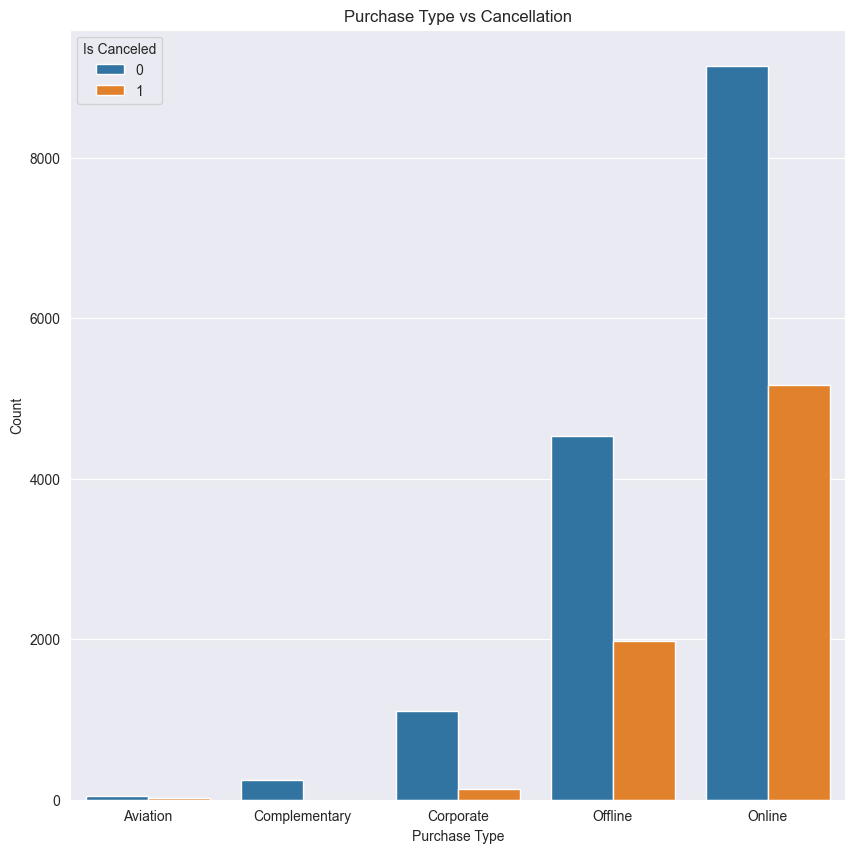

In [117]:

plt.figure(figsize=(10, 10))
sns.countplot(x='purchase_type', hue='is_canceled', data=df)
plt.title('Purchase Type vs Cancellation')
plt.xlabel('Purchase Type')
plt.ylabel('Count')
plt.legend(title='Is Canceled')
plt.show()

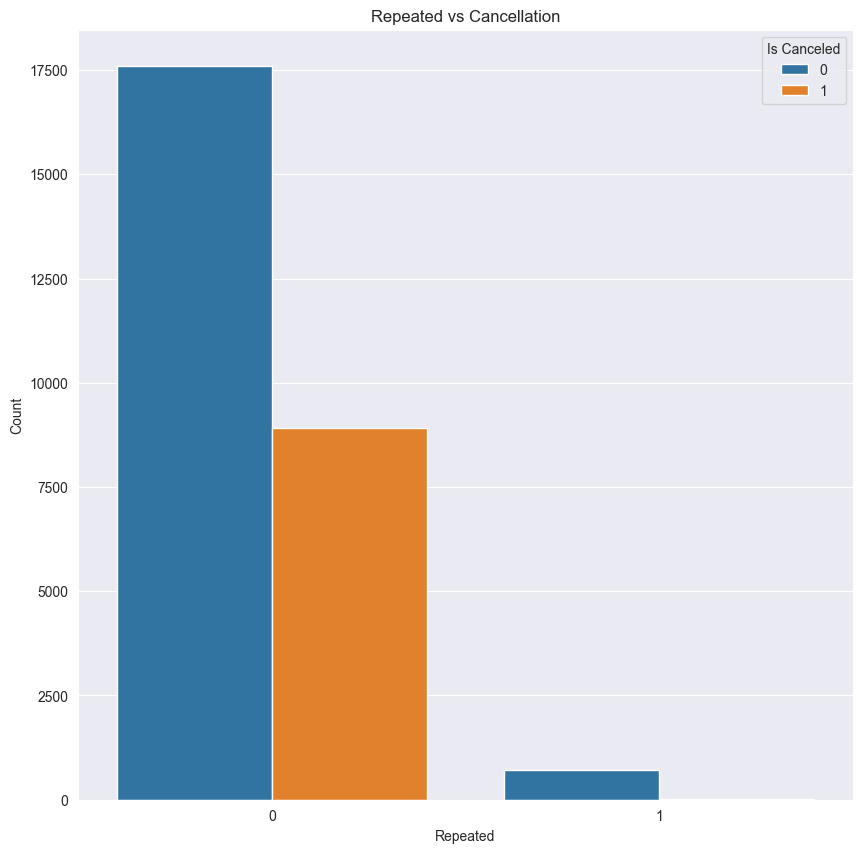

In [133]:
plt.figure(figsize=(10, 10))
sns.countplot(x='repeated', hue='is_canceled', data=df)
plt.title('Repeated vs Cancellation')
plt.xlabel('Repeated')
plt.ylabel('Count')
plt.legend(title='Is Canceled')
plt.show()

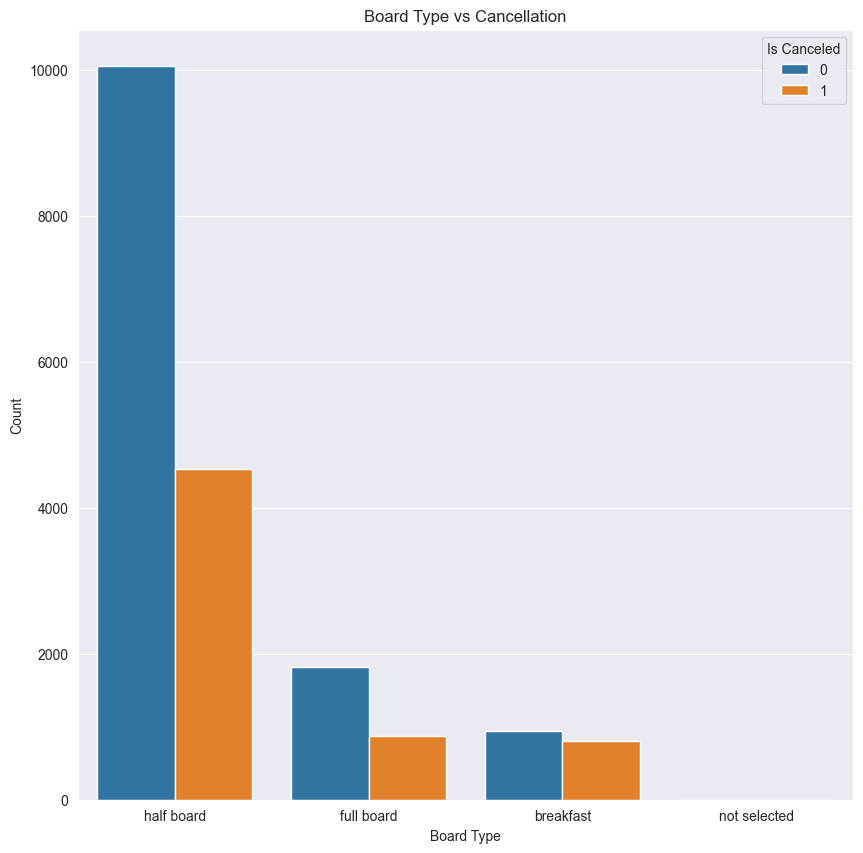

In [118]:
plt.figure(figsize=(10, 10))
sns.countplot(x='board_type', hue='is_canceled', data=df)
plt.title('Board Type vs Cancellation')
plt.xlabel('Board Type')
plt.ylabel('Count')
plt.legend(title='Is Canceled')
plt.show()

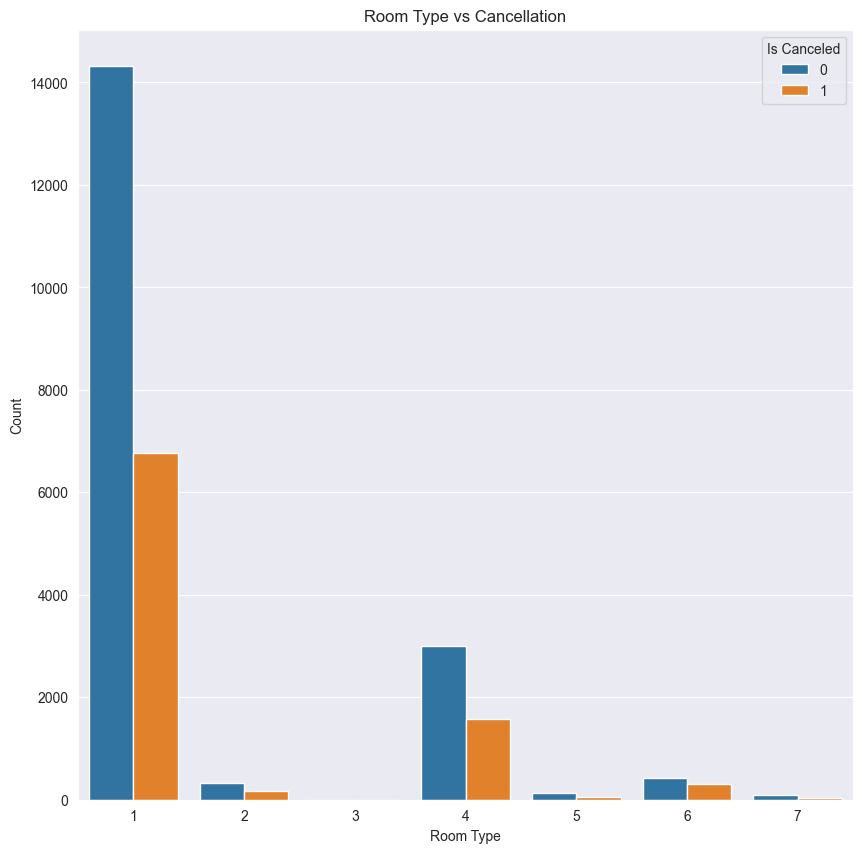

In [128]:
plt.figure(figsize=(10, 10))
sns.countplot(x='room_type', hue='is_canceled', data=df)
plt.title('Room Type vs Cancellation')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.legend(title='Is Canceled')
plt.show()

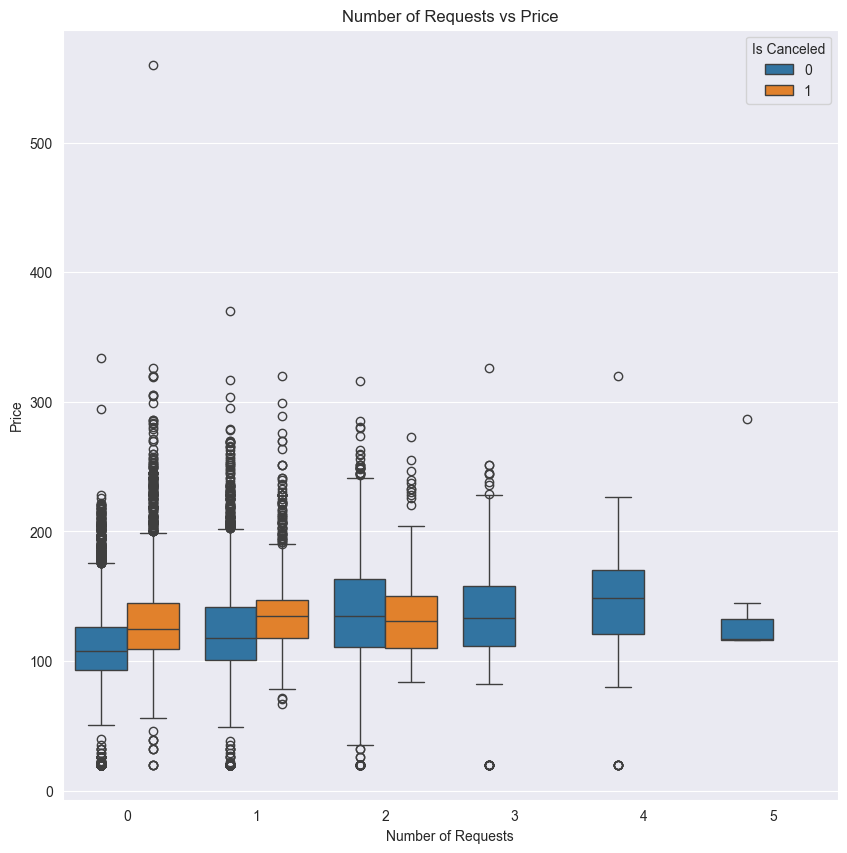

In [130]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='n_requests', y='price', hue='is_canceled', data=df)
plt.title('Number of Requests vs Price')
plt.xlabel('Number of Requests')
plt.ylabel('Price')
plt.legend(title='Is Canceled')
plt.show()

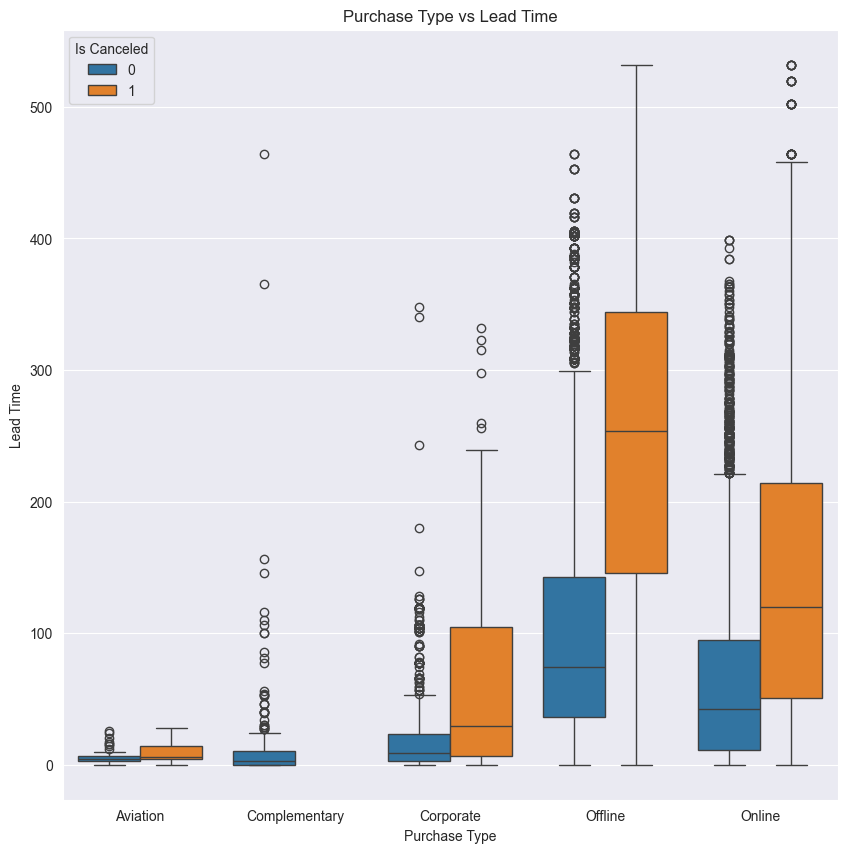

In [135]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='purchase_type', y='lead_time', hue='is_canceled', data=df)
plt.title('Purchase Type vs Lead Time')
plt.xlabel('Purchase Type')
plt.ylabel('Lead Time')
plt.legend(title='Is Canceled')
plt.show()